### Employee DataAnalytics Based Salary 
**Dataset Fields** <br/>
**salary** <br/>
a numeric variable, used as response variable: current salary in US dollars

**Birthdate**
birthdate 

**educ**<br/>
a numeric variable: educational level in years

**startsal**<br/>
a numeric variable: beginning salary in US dollars

**jobtime**<br/>
a numeric variable: months since hire

**prevexp**<br/>
a numeric variable: previous work experience in months

**minority**
a factor variable: minority classification with levels min, indicating minority ( 0 mean  minority , 1 mean no minority)

**gender**<br/>
a factor variable: gender type with levels f, indicating female, and m, indicating male

**jobcat**<br/>
a factor variable: type of job with levels (Clerical, Custodial, and manager)(1,2,3) Numerical format

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
emp_data=pd.read_excel("Employee_Data.xls")
emp_data.head()

,id,gender,bdate,educ,jobcat,salary,salbegin,jobtime,prevexp,minority
0,1,m,1952-02-03,15,3,57000,27000,98,144,0
1,2,m,1958-05-23,16,1,40200,18750,98,36,0
2,3,f,1929-07-26,12,1,21450,12000,98,381,0
3,4,f,1947-04-15,8,1,21900,13200,98,190,0
4,5,m,1955-02-09,15,1,45000,21000,98,138,0


In [3]:
emp_data.tail()

,id,gender,bdate,educ,jobcat,salary,salbegin,jobtime,prevexp,minority
469,470,m,1964-01-22,12,1,26250,15750,64,69,1
470,471,m,1966-08-03,15,1,26400,15750,64,32,1
471,472,m,1966-02-21,15,1,39150,15750,63,46,0
472,473,f,1937-11-25,12,1,21450,12750,63,139,0
473,474,f,1968-11-05,12,1,29400,14250,63,9,0


In [4]:
emp_data.shape

(474, 10)

In [5]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        474 non-null    int64         
 1   gender    474 non-null    object        
 2   bdate     473 non-null    datetime64[ns]
 3   educ      474 non-null    int64         
 4   jobcat    474 non-null    int64         
 5   salary    474 non-null    int64         
 6   salbegin  474 non-null    int64         
 7   jobtime   474 non-null    int64         
 8   prevexp   474 non-null    int64         
 9   minority  474 non-null    int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 37.2+ KB


In [6]:
emp_data.describe()

,id,educ,jobcat,salary,salbegin,jobtime,prevexp,minority
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,237.500000,13.491561,1.411392,34419.567511,17016.086498,81.109705,95.860759,0.219409
std,136.976275,2.884846,0.773201,17075.661465,7870.638154,10.060945,104.586236,0.414284
min,1.000000,8.000000,1.000000,15750.000000,9000.000000,63.000000,0.000000,0.000000
25%,119.250000,12.000000,1.000000,24000.000000,12487.500000,72.000000,19.250000,0.000000
50%,237.500000,12.000000,1.000000,28875.000000,15000.000000,81.000000,55.000000,0.000000
75%,355.750000,15.000000,1.000000,36937.500000,17490.000000,90.000000,138.750000,0.000000
max,474.000000,21.000000,3.000000,135000.000000,79980.000000,98.000000,476.000000,1.000000


In [7]:
emp_data.isnull().sum()

id          0
gender      0
bdate       1
educ        0
jobcat      0
salary      0
salbegin    0
jobtime     0
prevexp     0
minority    0
dtype: int64

### Fill null Value

In [8]:
emp_data.fillna(method="bfill",inplace=True)

In [9]:
emp_data.isnull().sum()

id          0
gender      0
bdate       0
educ        0
jobcat      0
salary      0
salbegin    0
jobtime     0
prevexp     0
minority    0
dtype: int64

### A. What is average salary of all employees  (let’s call is AVG_SAL)

In [10]:
AVG_SAL=emp_data['salary'].mean()
print("Avreage salary:",AVG_SAL)

Avreage salary: 34419.56751054852


### B.Find how many male employees who earn below the AVG_SAL

In [11]:
male_salary_detail=emp_data.loc[(emp_data['gender']=='m') & (emp_data['salary']<AVG_SAL)].value_counts()
male_salary_detail

id   gender  bdate       educ  jobcat  salary  salbegin  jobtime  prevexp  minority
6    m       1958-08-22  15    1       32100   13500     98       67       0           1
320  m       1936-11-10  12    1       22050   15000     76       385      0           1
302  m       1939-09-28  8     1       22350   15000     78       320      1           1
305  m       1941-10-25  12    2       30750   15750     77       317      0           1
306  m       1966-04-05  15    1       30750   16500     77       41       0           1
                                                                                      ..
133  m       1959-09-12  15    1       27000   15750     89       87       0           1
132  m       1953-05-17  12    1       27300   17250     89       175      0           1
131  m       1962-02-08  15    1       31500   15750     89       22       0           1
127  m       1950-09-01  12    2       30750   15000     90       209      1           1
471  m       1966-08-03  1

In [12]:
print("Total {} Male Candidate have a below {} of Average salary".format(len(male_salary_detail),AVG_SAL))

Total 138 Male Candidate have a below 34419.56751054852 of Average salary


### C. Find out how many female employees who earn below the AVG_SAL

In [13]:
Female_salary_detail=emp_data.loc[(emp_data['gender']=='f') & (emp_data['salary']<AVG_SAL)].value_counts()
Female_salary_detail

id   gender  bdate       educ  jobcat  salary  salbegin  jobtime  prevexp  minority
3    f       1929-07-26  12    1       21450   12000     98       381      0           1
346  f       1968-08-16  15    1       22950   13950     73       22       0           1
331  f       1942-02-04  12    1       24450   12000     75       144      0           1
332  f       1964-05-10  16    1       33000   18000     75       26       0           1
334  f       1966-05-09  12    1       24450   10950     75       32       1           1
                                                                                      ..
193  f       1966-07-22  12    1       24750   12000     84       41       1           1
194  f       1938-04-10  15    1       27150   15750     84       231      1           1
195  f       1955-11-06  12    1       26400   12750     84       36       1           1
196  f       1946-03-03  16    1       23100   12000     84       214      1           1
474  f       1968-11-05  1

In [14]:
print("Total {} Female Candidate have a below {} of Average salary".format(len(Female_salary_detail),AVG_SAL))

Total 191 Female Candidate have a below 34419.56751054852 of Average salary


### D.Find how many male employees who earn equal or more than the AVG_SAL

In [15]:
male_salary_detail1=emp_data.loc[(emp_data['gender']=='m') & (emp_data['salary']>=AVG_SAL)].value_counts()
male_salary_detail1

id   gender  bdate       educ  jobcat  salary  salbegin  jobtime  prevexp  minority
1    m       1952-02-03  15    3       57000   27000     98       144      0           1
2    m       1958-05-23  16    1       40200   18750     98       36       0           1
318  m       1961-02-19  16    3       48750   21990     76       61       0           1
310  m       1964-03-23  16    1       44875   21240     77       22       0           1
308  m       1963-02-01  15    1       34500   18000     77       63       0           1
                                                                                      ..
101  m       1960-03-14  16    3       60625   22500     91       44       0           1
100  m       1963-10-25  18    3       78250   27480     91       47       0           1
97   m       1953-01-18  17    1       40200   19500     92       168      1           1
89   m       1961-06-24  19    3       68750   27480     92       8        0           1
472  m       1966-02-21  1

In [16]:
print("Total {} Male Candidate have a equal or More than {} of Average salary".format(len(male_salary_detail1),AVG_SAL))

Total 120 Male Candidate have a equal or More than 34419.56751054852 of Average salary


### E. Find how many female employees who earn equal or more than the AVG_SAL

In [17]:
Female_salary_detail1=emp_data.loc[(emp_data['gender']=='f') & (emp_data['salary']>=AVG_SAL)].value_counts()
Female_salary_detail1

id   gender  bdate       educ  jobcat  salary  salbegin  jobtime  prevexp  minority
14   f       1949-02-26  15    1       35100   16800     98       137      1           1
240  f       1961-06-15  16    3       54375   18750     81       81       0           1
413  f       1966-03-13  16    3       43500   19500     68       11       0           1
371  f       1966-04-05  16    3       58125   18000     71       11       0           1
370  f       1963-01-20  16    1       36600   18000     71       12       0           1
350  f       1939-04-21  12    1       37650   15750     73       132      0           1
348  f       1962-06-11  16    3       56750   30000     73       15       0           1
333  f       1965-01-26  15    1       37050   18000     75       5        0           1
315  f       1969-09-19  12    1       34500   12150     77       4        0           1
277  f       1965-05-20  16    3       43000   17490     79       20       0           1
266  f       1963-10-07  1

In [18]:
print("Total {} Female Candidate have a equal or More than {} of Average salary".format(len(Female_salary_detail1),AVG_SAL))

Total 25 Female Candidate have a equal or More than 34419.56751054852 of Average salary


### Gender distribution (male and Female count)

In [19]:
emp_data['gender'].value_counts()

m    258
f    216
Name: gender, dtype: int64

In [20]:
# Average Salary By Gender
GenderSal=emp_data.groupby(['gender'],as_index=False).salary.mean()
GenderSal

,gender,salary
0,f,26031.921296
1,m,41441.782946


### Create a New Column Age

In [21]:
### To find unique birthdate year
from datetime import datetime, date

year=pd.DatetimeIndex(emp_data['bdate']).year
year.unique()

Int64Index([1952, 1958, 1929, 1947, 1955, 1956, 1966, 1946, 1950, 1960, 1949,
            1962, 1964, 1940, 1963, 1965, 1933, 1942, 1954, 1944, 1961, 1938,
            1931, 1959, 1948, 1968, 1967, 1953, 1930, 1932, 1936, 1951, 1941,
            1939, 1937, 1935, 1943, 1934, 1945, 1969, 1970, 1957, 1971],
           dtype='int64', name='bdate')

In [22]:
current_date=date.today()
current_date

datetime.date(2022, 7, 6)

In [23]:
current_year=current_date.year
current_year

2022

In [24]:
emp_data["age"]=current_year-year

In [25]:
emp_data.head()

,id,gender,bdate,educ,jobcat,salary,salbegin,jobtime,prevexp,minority,age
0,1,m,1952-02-03,15,3,57000,27000,98,144,0,70
1,2,m,1958-05-23,16,1,40200,18750,98,36,0,64
2,3,f,1929-07-26,12,1,21450,12000,98,381,0,93
3,4,f,1947-04-15,8,1,21900,13200,98,190,0,75
4,5,m,1955-02-09,15,1,45000,21000,98,138,0,67


### Salary Analysis By Job Category

In [26]:
emp_data['jobcat'].value_counts()

1    363
3     84
2     27
Name: jobcat, dtype: int64

In [27]:
# Average Salary By Job Category 
JobcateDate=emp_data.groupby(['jobcat'],as_index=False).salary.mean()
JobcateDate

,jobcat,salary
0,1,27838.539945
1,2,30938.888889
2,3,63977.797619


###  Visualization 

<AxesSubplot:xlabel='jobcat', ylabel='salary'>

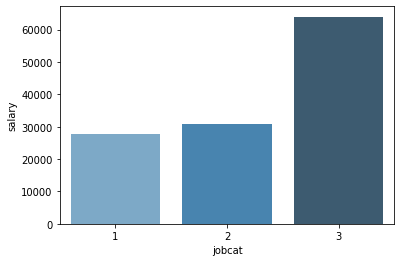

In [28]:
# Average Salary Distribution By Job Category
sns.barplot(x='jobcat',y='salary',data=JobcateDate,palette="Blues_d")


<AxesSubplot:xlabel='gender', ylabel='count'>

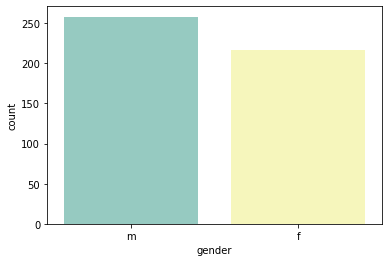

In [29]:
sns.countplot(x='gender',data=emp_data,palette="Set3")

<AxesSubplot:xlabel='gender', ylabel='salary'>

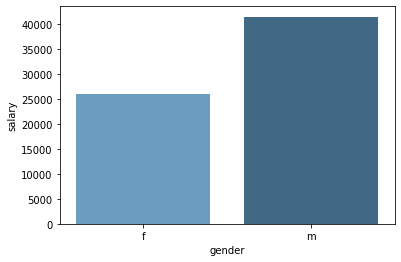

In [30]:
# Average Salary Distribution By Gender Category
sns.barplot(x='gender',y='salary',data=GenderSal,palette="Blues_d")

<AxesSubplot:xlabel='minority', ylabel='count'>

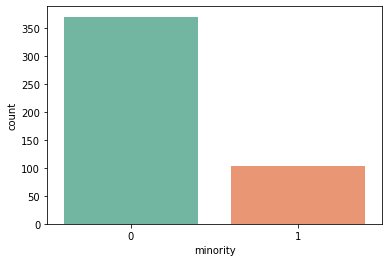

In [31]:
sns.countplot(x='minority',data=emp_data,palette="Set2")

<AxesSubplot:xlabel='minority', ylabel='salary'>

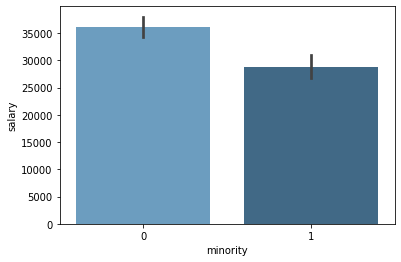

In [32]:
# Average Salary Distribution minority level
sns.barplot(x='minority',y='salary',data=emp_data,palette="Blues_d")